# Evaluation of Graph Neural Network segment classifier

In [1]:
# Concurrency config
import os
os.environ['OMP_NUM_THREADS'] = '4'

In [2]:
# Notebook utils
from nb_utils import (get_test_data_loader, load_config, load_summaries,
                      load_model, apply_model, compute_metrics,
                      plot_train_history, draw_sample, plot_outputs_roc)

In [3]:
%matplotlib inline

In [4]:
# Config path
config_file = '../configs/segclf_med.yaml'

In [5]:
!cat $config_file

output_dir: ${SCRATCH}/heptrkx/results/gnnsegclf_med_009

trainer:
    name: gnn
    real_weight: 2.5   # 0.5 / 0.2
    fake_weight: 0.625 # 0.5 / 0.8

data:
    name: hitgraphs
    input_dir: ${SCRATCH}/heptrkx/data/hitgraphs_med_002
    n_train: 16384
    n_valid: 2048
    batch_size: 1
    n_workers: 4

model:
    name: 'gnn_segment_classifier'
    input_dim: 3
    hidden_dim: 64
    n_iters: 4
    loss_func: 'binary_cross_entropy'
    optimizer: 'Adam'
    learning_rate: 0.001

training:
    n_epochs: 32


In [6]:
config = load_config(config_file)
summaries = load_summaries(config)

## Plot the Training loss and accuracy

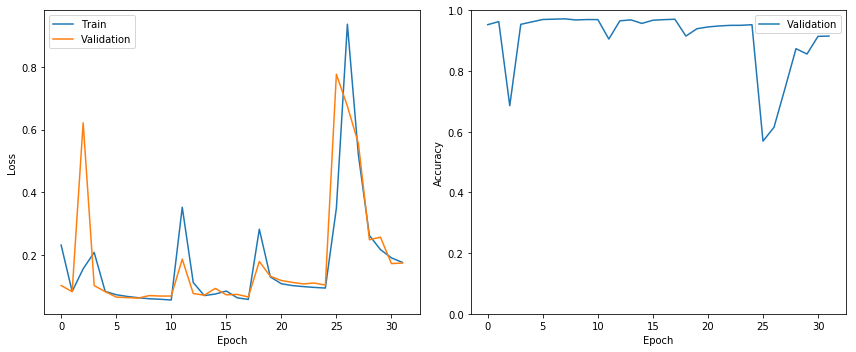

In [7]:
plot_train_history(summaries)

## Load the trained model

In [8]:
# Reload best epoch
best_epoch = summaries.epoch.loc[summaries.valid_loss.idxmin()]
model = load_model(config, reload_epoch=best_epoch).eval()

## Load the test data set

In [9]:
n_test = 4

test_loader = get_test_data_loader(config, n_test=n_test)

## Evaluate the model on the test dataset

In [10]:
%%time
test_preds, test_targets = apply_model(model, test_loader)

CPU times: user 5.31 s, sys: 384 ms, total: 5.7 s
Wall time: 1.48 s


In [11]:
%%time
threshold = 0.5
test_metrics = compute_metrics(test_preds, test_targets, threshold=threshold)

CPU times: user 56.3 ms, sys: 845 µs, total: 57.1 ms
Wall time: 14 ms


In [12]:
print('Test set results with threshold of', threshold)
print('Accuracy:  %.4f' % test_metrics.accuracy)
print('Precision: %.4f' % test_metrics.precision)
print('Recall:    %.4f' % test_metrics.recall)

Test set results with threshold of 0.5
Accuracy:  0.9734
Precision: 0.9144
Recall:    0.9863


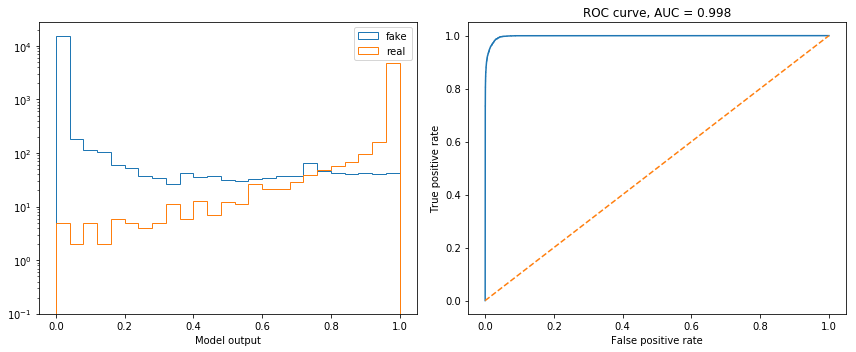

In [13]:
plot_outputs_roc(test_preds, test_targets, test_metrics)

## Visualize predictions

In [ ]:
%%time

n_draw = 4
for i in range(n_draw):
    X, Ri, Ro, y = test_loader.dataset[i]
    pred = test_preds[i].numpy()
    draw_sample(X, Ri, Ro, pred, alpha_labels=True)

In [ ]:
%%time

n_draw = 1
for i in range(n_draw):
    X, Ri, Ro, y = test_loader.dataset[i]
    pred = test_preds[i].numpy()
    draw_sample(X, Ri, Ro, pred)
    draw_sample(X, Ri, Ro, y)

CPU times: user 1min 12s, sys: 316 ms, total: 1min 12s
Wall time: 1min 12s
